# 哈里斯角点检测
我们直观的认为角是曲线方向的快速变化。角是高度有效的特征，因为它们对视点是独特且合理不变的。由于这些特性，角在诸如自动导航追踪，立体机器视觉算法和图像数据库查询等应用中通常频繁用于匹配图像特征。_

基本方法如下：
在图像上方移动一个小窗口检测角。检测器窗设计用于计算灰度变化。我们感兴趣的三个场景：
1. 各个方向零灰度变化的区域，这发生在检测器位于一个恒定区域中时。
2. 在某个方向变化但在其正交方向上不变化的区域，这发生在检测器窗口横跨两个区域之间的边界时候。
3. 所有方向发生重大变化的区域。

令$f$表示图像，令$f(s,t)$表示由$(s,t)$的值定义的一小块图像。尺寸相同但移动了$(x,y)$的小块图像是$f(s+x,t+y)$。于是，两幅小块图像的差的平方加权和:
$$
    C(x,y) = \sum_x \sum_t w(s,t)[f(s+x , t+y) - f(s,t)]^2
$$
式中，$w(s,t)$是一个后面很快就要讨论的加权函数。移位后的小块图像可以用来泰勒级别展开的线性项来近似:
$$
    f(s+x,t+y) \approx  f(s,t) + xf_x(s,t) +yf_y(s,t)
$$
式中，$f_x(s,t) = \partial f / \partial x $ 和 $f_y = \partial f / \partial y $,他们都在$(s,t)$出计算。于是，可写为：
$$
    C(x,y) = \sum_x \sum_y w(s,t)[xf_x(s,t) + xf_y(s,t)]^2
$$

上式写为矩阵形式:
$$
    C(x,y) = [x,y]M \begin{bmatrix} x \\ y \end{bmatrix}
$$
式中，
$$
    M = \sum_x \sum_t w(s,t)A
$$
和
$$
    A = \begin{bmatrix} f_x^2 & f_xf_y \\ f_xf_y & f_y^2 \end{bmatrix}
$$

矩阵$M$有时称为哈里斯矩阵。

观察式子发现，一个像素是否是之前的提到的3种情况，和M矩阵的性质有关。
经过研究发现：
$$
    R = \lambda_x \lambda_y - k (\lambda_x + \lambda_y) ^ 2 = det(M) - ktrace^2(M)
$$

k通常取0.04～0.06

当R值 > 0时，认为是一个角

R == 0 时， 是边

R < 0 时 ，是平坦区域

In [71]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import ndimage

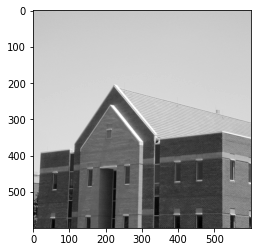

In [72]:
f = plt.imread("./../images/building-600by600.tif")
plt.imshow(f , "gray")

f = ndimage.gaussian_filter(f, 3)

In [73]:
fx,fy = np.gradient(f)
fxx = fx ** 2 
fyy = fy ** 2
fxy = fx * fy

In [74]:
h,w  = f.shape
window = 5  
k = 0.04
offset = int (window / 2)
threshold = 10000
Corner = np.zeros((h,w))
for y in range(offset , h):
    for x in range(offset , w):
        start_y = y-offset
        end_y = y + offset + 1
        start_x = x - offset 
        end_x = x + offset + 1 
        wfxx = fxx[start_y:end_y , start_x:end_x].sum()
        wfxy = fxy[start_y:end_y , start_x:end_x].sum()
        wfyy = fyy[start_y:end_y , start_x:end_x].sum()

        det = wfxx * wfyy - wfxy * wfxy
        trace = wfxx + wfyy

        R = det - k * (trace ** 2) 
        if R > threshold:
            Corner[y][x] = 255


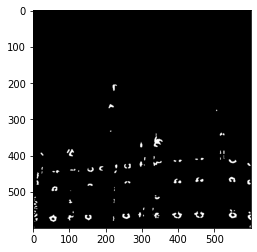

In [75]:
plt.imshow(Corner , "gray")

In [76]:
g = np.expand_dims(f , 2)
g = g.repeat(3, axis = 2)
g.shape

corner_y , corner_x = np.where(Corner == 255)
g[corner_y , corner_x] = np.array([255,0,0])

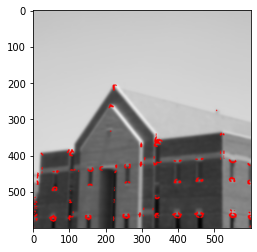

In [77]:
plt.imshow(g )